In [47]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
%matplotlib inline

In [48]:
from mpl_toolkits.basemap import Basemap

In [49]:
from gcmap import GCMapper, Gradient

In [50]:
df = pd.read_csv('USA_syrian_count.csv')
df.head()

,placement_state,number_of_refugees
0,Arizona,833
1,California,1450
2,Colorado,120
3,Connecticut,341
4,Florida,642


In [51]:
##one time of method
from plotly import plotly as py

In [52]:
for col in df.columns:
    df[col] = df[col].astype(str)


In [53]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [54]:
df['text'] = df['placement_state'] + '<br>' +\
    'number_of_refugees'+df['number_of_refugees']

In [55]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['placement_state'],
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

In [56]:
layout = dict(
        title = '',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [ ]:
#second method
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [ ]:
import folium
phone_map = folium.Map()

mapd = pd.read_csv('test_file.csv')
mapd.head()

In [ ]:
for i in range(0,len(mapd)):

    marker = folium.Marker([mapd.iloc[i]['latitude'], mapd.iloc[i]['longitude']], popup=mapd.iloc[i]['country_of_origin'])
    marker.add_to(phone_map)

# The last object in the cell always gets shown in the notebook
phone_map

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_country_name_here")
location = geolocator.geocode("Angola")

In [ ]:
print((location.latitude, location.longitude))


In [57]:
import folium
phone_map = folium.Map()

mapd = pd.read_csv('test_syria.csv')
mapd.head()

,country_of_origin,oct_2015,nov_2015,dec_2015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,lat,log
0,Angola,0,0,0,0,0,0,3,0,0,0,0,0,34.8021,38.9968
1,Burundi,59,5,25,49,56,68,48,62,85,62,116,59,34.8021,38.9968
2,Cameroon,0,0,0,0,0,0,1,2,6,0,2,3,34.8021,38.9968
3,Central African Republic,0,14,4,0,0,0,12,4,0,8,206,153,34.8021,38.9968
4,Chad,0,0,0,0,0,0,0,1,0,0,0,1,34.8021,38.9968


In [58]:


for l in mapd['country_of_origin']:
    location = geolocator.geocode(l)
    #print(location,(location.latitude, location.longitude))
    
    marker = folium.Marker([location.latitude, location.longitude], popup=l)
    marker.add_to(phone_map)

# The last object in the cell always gets shown in the notebook
phone_map

In [5]:
import pandas as pd
from gcmap import GCMapper, Gradient
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from mpl_toolkits.basemap import Basemap
from plotly import plotly as py
import folium
from geopy.geocoders import Nominatim
%matplotlib inline

In [6]:
routes = pd.read_csv('test_syria.csv',na_values="NaN")

In [10]:
geolocator = Nominatim(user_agent="specify_your_country_name_here")

In [11]:
grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))

In [32]:
src_location = geolocator.geocode("Syria")
src_lat = round(src_location.latitude,1)
src_long = round(src_location.longitude,1)
routes['lat']=src_lat
routes['log']=src_long
routes['lat1']=1
routes['log1']=1

In [33]:
dest_lat = list()
dest_long = list()
for l in routes['country_of_origin']:
    #print(l)
    location = geolocator.geocode(l)
    routes.loc[routes['country_of_origin']==l,['lat1']]=round(location.latitude,1)
    routes.loc[routes['country_of_origin']==l,['log1']]=round(location.longitude,1)

In [38]:
gcm = GCMapper(cols=grad)

In [35]:
routes

,country_of_origin,oct_2015,nov_2015,dec_2015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,lat,log,lat1,log1
0,Angola,0,0,0,0,0,0,3,0,0,0,0,0,34.6,39.0,-11.9,17.6
1,Burundi,59,5,25,49,56,68,48,62,85,62,116,59,34.6,39.0,-3.4,29.9
2,Cameroon,0,0,0,0,0,0,1,2,6,0,2,3,34.6,39.0,4.6,13.2
3,Central African Republic,0,14,4,0,0,0,12,4,0,8,206,153,34.6,39.0,25.2,55.2
4,Chad,0,0,0,0,0,0,0,1,0,0,0,1,34.6,39.0,15.6,19.0
5,Congo,0,0,1,0,1,1,3,0,8,1,0,1,34.6,39.0,-0.7,15.6
6,Eritrea,160,63,192,202,224,183,165,84,47,232,204,193,34.6,39.0,16.0,38.0
7,Ethiopia,69,70,88,44,52,97,116,89,96,122,106,182,34.6,39.0,10.2,38.7
8,Gabon,0,0,0,0,0,0,0,2,0,0,0,0,34.6,39.0,-0.9,11.7
9,Guinea,0,0,0,0,3,0,0,0,2,0,0,0,34.6,39.0,10.7,-10.7


In [39]:
gcm.set_data(routes['log'],routes['lat'],routes['log1'],routes['lat1'])

D:\ProgrammingInstall\Anaconda3\envs\Dviz\lib\site-packages\gcmap\gcmap.py:88: RuntimeWarning:

divide by zero encountered in true_divide



In [61]:
phone_map
gcm.draw()

TypeError: draw() takes 1 positional argument but 2 were given

In [71]:
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
color_list = [(0.0, 0.0, 0.0, 0.0),
              (204/255.0, 0, 153/255.0, 0.6),
              (255/255.0, 204/255.0, 230/255.0, 1.0)]
cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,N=5)

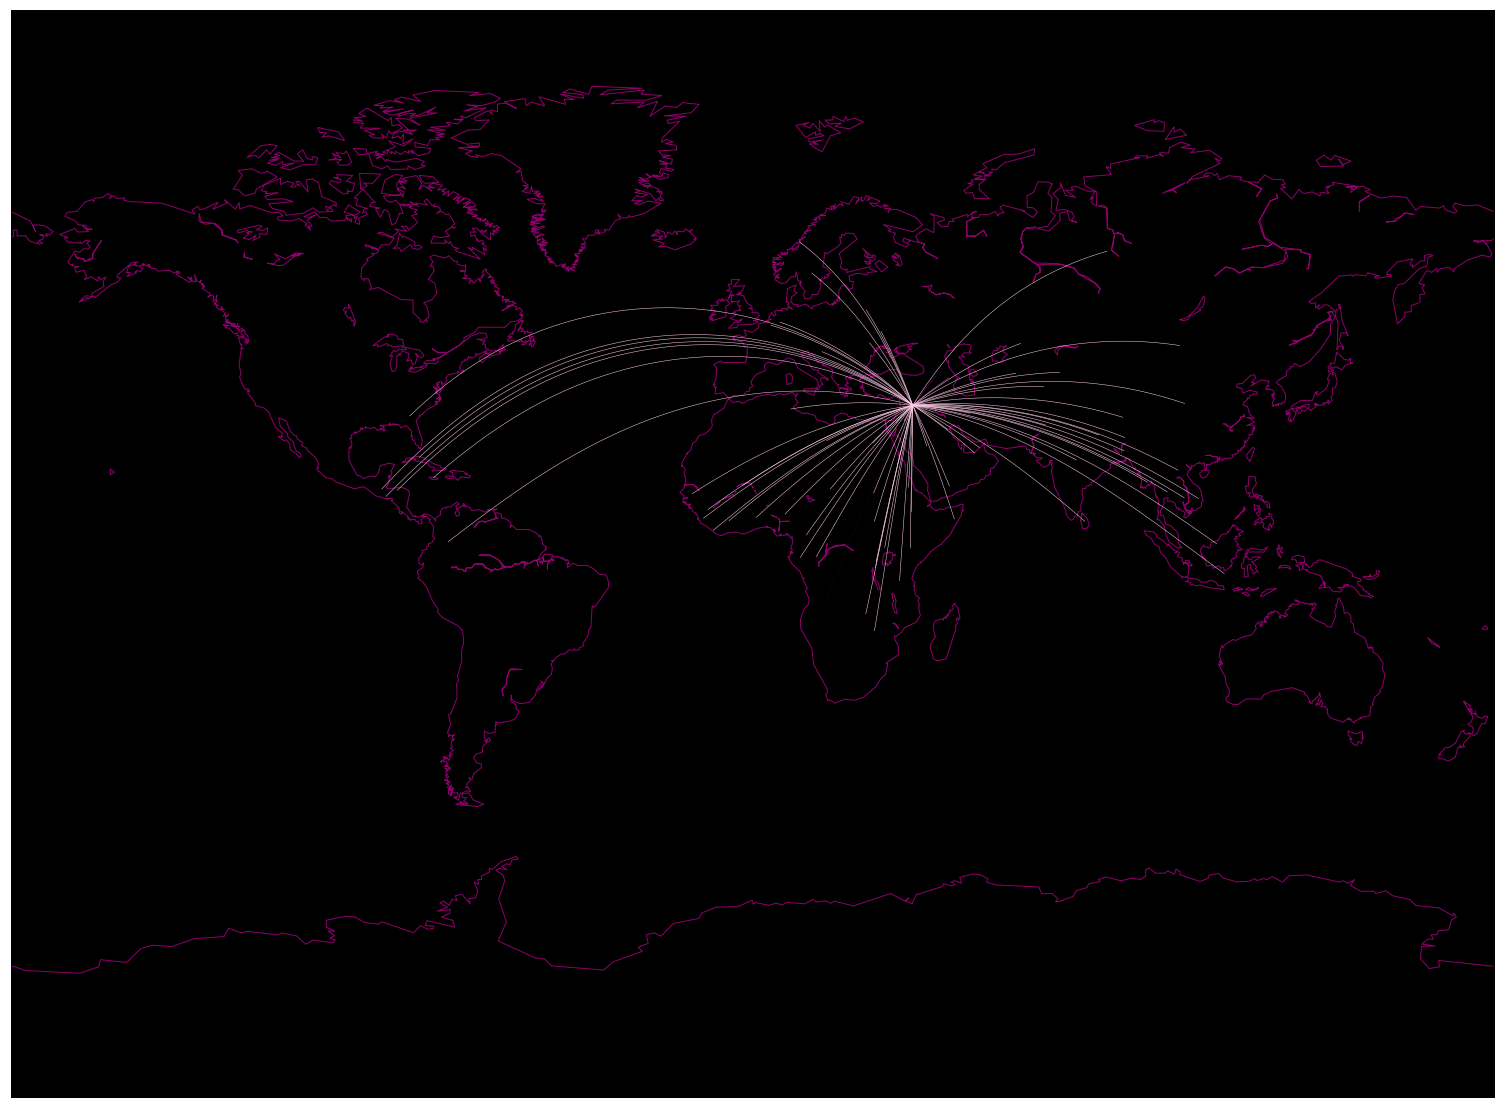

In [98]:
plt.figure(figsize=(27, 20))
bg_color = (0.0, 0.0, 0, 1.0)
coast_color = (204/255.0, 0, 153/255.0, 0.7)
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines(color=coast_color, linewidth=1.0)
m.fillcontinents(color=bg_color, lake_color=bg_color)
m.drawmapboundary(fill_color=bg_color)
for i, route in enumerate(routes.sort_values(by='country_of_origin',ascending=True).iterrows()):
    color = cmap(i * 1.0 / 5)
    line, = m.drawgreatcircle(route[1]['log1'],route[1]['lat1'],
                              route[1]['log'], route[1]['lat'],
                              linewidth=0.5, color=color)